**Hola!**

Mi nombre es Enrique Romero

<div class="alert alert-danger">
<b>️⚠️  Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
- Primero importaremos todos los conjuntos de datos y los transformaremos a df, realizaremos un print para verificar que la información esta en orden, en caso de tener un error, procederemos a revisar cual es y corregirlo, es probable que otros parametros como "sep=" y "decimal=" deban ser agregados a la creación del DataFrame para poder visualizar la información correctamente.

In [398]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import matlibplot pyplot as plot


In [ ]:
# leer conjuntos de datos en los DataFrames Version online
#Se han agregado separadores al ver que en el siguiente bloque los DataFrames arrojaban una estructura incorrecta.

instacart_orders_df = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
products_df = pd.read_csv("/datasets/products.csv", sep=";")
departmen_df = pd.read_csv("/datasets/departments.csv",sep=";")
aisles_df = pd.read_csv("/datasets/aisles.csv", sep=";")
order_products_df= pd.read_csv("/datasets/order_products.csv",sep=";")

In [399]:
# leer conjuntos de datos en los DataFrames Version ofline

#Se han agregado separadores al ver que en el siguiente bloque los DataFrames arrojaban una estructura incorrecta.

# instacart_orders_df = pd.read_csv("D:\\Ejercicios\\Python_Tripleten\\TripleTen\\Projects\\instacart_orders.csv", sep=";")
# products_df = pd.read_csv("D:\\Ejercicios\\Python_Tripleten\\TripleTen\\Projects\\products.csv", sep=";")
# departmen_df = pd.read_csv("D:\\Ejercicios\\Python_Tripleten\\TripleTen\\Projects\\departments.csv",sep=";")
# aisles_df = pd.read_csv("D:\\Ejercicios\\Python_Tripleten\\TripleTen\\Projects\\aisles.csv", sep=";")
# order_products_df= pd.read_csv("D:\\Ejercicios\\Python_Tripleten\\TripleTen\\Projects\\order_products.csv",sep=";")

In [400]:
order_products_df[order_products_df["product_id"]==14721] #Compruebo que la base original no tiene coherencia. 

,order_id,product_id,add_to_cart_order,reordered
3636585,938604,14721,5.0,1


In [401]:
def description(database, name):

    # mostrar información del DataFrame df
    print(f'----DataFrame {name}----') 
    print(database.head(),end="\n" )

    #Verificaremos si las columnas tienen un mismo sintaxis, en este caso, snake_case.
    print(f'----Columnas en {name}----') 
    print(database.columns,end="\n" )

    #Verificaremos el número de valores ausentes en el df
    print(f'----Información General de {name}----') 
    database.info(show_counts=True)



In [402]:
description(instacart_orders_df, 'instacart_orders_df')

# Confirmamos que tenemos algunos valores ausentes en la columna "days_since_prior_order"
# Days_since_prior_order debe ser typo entero

----DataFrame instacart_orders_df----
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
----Columnas en instacart_orders_df----
Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')
----Información General de instacart_orders_df----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dt

In [403]:
description(products_df, 'products_df')

#Confirmamos que tenemos algunos valores ausentes en la columna "product_name"
# Cambiar product name astype(str)
# Product Id podría ser Category (debo evaluar cuantos elementos tiene, si son mas de 50 seguire en entero)

----DataFrame products_df----
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
----Columnas en products_df----
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
----Información General de products_df----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null 

In [404]:
description(aisles_df, 'aisles_df')

#No existen varoles ausentes pero la columna aisle debería ser cambiado a str

----DataFrame aisles_df----
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
----Columnas en aisles_df----
Index(['aisle_id', 'aisle'], dtype='object')
----Información General de aisles_df----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [405]:
description(departmen_df, 'department')
#No existen varoles ausentes pero la columna department debería ser cambiado a str

----DataFrame department----
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
----Columnas en department----
Index(['department_id', 'department'], dtype='object')
----Información General de department----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [406]:
description(order_products_df, 'order_products')
#"add_to_cart_order" tiene valores nulos y debería ser entero (probablemente al tener nulos paso a float)

----DataFrame order_products----
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
----Columnas en order_products----
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
----Información General de order_products----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


Fue necesario agregarle formato a los documentos CSV para poder crearlos dento de un data frame, los nombres de las columnas tienen una correcta syntaxis, sin embargo debemos de trabajar un en la reclasificación de algunas columnas.

He llegado a estas conclusiones hasta ahora:


#### instacart_orders_df 
- Confirmamos que tenemos algunos valores ausentes en la columna "days_since_prior_order" y que su formato debería ser entero

#### products_df 
- Confirmamos que tenemos algunos valores ausentes en la columna "product_name"
- Cambiar product name astype(str)
- Product Id podría ser Category (debo evaluar cuantos elementos tiene, si son mas de 50 seguire en entero)

#### aisles_df 
- No existen varoles ausentes pero la columna aisle debería ser cambiado a str


#### department 
- No existen varoles ausentes pero la columna department debería ser cambiado a str

#### order_products
- "add_to_cart_order" tiene valores nulos y debería ser entero (probablemente al tener nulos paso a float)

Nuestro siguiente paso deberá ser identificar y procesar los valores nulos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [407]:
# Revisa si hay pedidos duplicados

# instacart_orders_df.info()  # Tenemos un total de 478966 values

instacar_duplicates = instacart_orders_df[instacart_orders_df.duplicated()] #Procedo a crear un df con los valores duplicados.

print(instacar_duplicates.count()) #encontramos 15 duplicados la última columna muestra 13 por los NaN
print(instacar_duplicates, end='\n\n')  #muestro la tabla completa (al no ser muchos valores), para tener una perspectiva visual, observo que el día Miercoles a las 2 se duplicaron estos elementos

print("La diferencia entre la primera y última orden duplicada es de",(instacar_duplicates["order_id"].max()) - (instacar_duplicates["order_id"].min())) #Quería comprobar cuantas ordenes había entre la primera y la última orden perdida, son demasiadas, parece que el error no se hizo en una determinada hora de captura.

order_id                  15
user_id                   15
order_number              15
order_dow                 15
order_hour_of_day         15
days_since_prior_order    13
dtype: int64
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Sí, se registraron 15 duplicados el día 3 a las 2 de la mañana, sin embargo al filtrar por el día y la hora en específico, observe que los order ID se encontraban muy separados para que fuera un error al momento de su captura en pocas palabras, se registraron 2,453,331 de ordenes entre la primera y la última duplicada. 

In [408]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

# Me gustaría profundizar en los valores duplicados, creare una lista que filtre día miercoles y 2 para ver que observo
instacart_orders_df_filter = instacart_orders_df[(instacart_orders_df["order_dow" ]== 3) & (instacart_orders_df["order_hour_of_day" ]== 2)]
print("Se registraron", instacart_orders_df_filter["order_id"].count(), 'filas para el día miercoles a las 2 a.m.')
instacart_orders_df_filter.sort_values(by='order_id').head(10)

#Parece que esto paso solo para ciertos elementos del miercoles a las dos de la tarde, al principio creó que influiría el minuto y segundo en el que paso, sin embargo ahora pienso que fue 
#un error post captura, dentro de la base de datos.


Se registraron 121 filas para el día miercoles a las 2 a.m.


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
316583,272079,121263,7,3,2,3.0
210068,284770,137352,7,3,2,8.0
359625,332561,201301,1,3,2,NaN
195093,350018,142887,6,3,2,1.0
29129,353088,46038,4,3,2,11.0


¿Qué sugiere este resultado?

Que los valores fueron duplicados despues de su captura.

In [409]:
# Elimina los pedidos duplicados

#Procedo a eliminar duplicados.
instacart_orders_df.drop_duplicates(inplace=True) #Elimino duplicados de la base original


In [410]:
# Se vuelve a verificar si hay filas duplicadas
print(instacart_orders_df.duplicated().sum()) #Si suma 0 el valor querra decir que no hay repetidos.
instacart_orders_df.info() #Compruebo que las filas hayan sido eliminadas (aún queda pendiente arreglar los floats.)

0
<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [411]:
# Se vuelve a verificar únicamente si hay IDs duplicados de pedidos
instacart_orders_df["order_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Me dirijiría con mi superior o en defecto con el departamento encargado de recibir las bases de datos para informarle el bug de los valores duplicados, detallando mis hallazgos,

- Tuvimos 15 valores duplicados
- El bug afecto solo a algunos elementos del día 3 a las 2 a.m.
- Guiandonos en los order_id, podemos pensar que estos elementos fueron capturados en momentos distintos, por lo que no parece un error de captura en el sistema.
- Es posible que existiera un bug que afectara el elemento y debería de buscarse la causa.

También me gustaría solicitar la fecha completa de la captura.

### `products` data frame

In [412]:
# Verifica si hay filas totalmente duplicadas
products_df_duplicates = products_df.duplicated()
products_df_duplicates.sum() # no hay filas duplicadas
products_df.info() #Product name tiene valores ausentes, tenerlo en mente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [413]:
# Verifica únicamente si hay IDs duplicadas de productos
products_df['product_id'].duplicated().sum()# no hay product_id duplicados
products_df['product_name'].isna().sum() #1258 na values


1258

In [414]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_df['product_name'].str.lower().duplicated().sum() #Confirmo que sí tenemos nombres duplicados
products_df['product_name'] = products_df['product_name'].str.lower() #formateamos la columna
product_list= products_df['product_name'].unique() #Realizo una lista de los productos para ver si tenemos repetidos
# product_list.sort() #Observo que al tener valores ausentes no me permite hacer sort.

#Error esperado al ejecutar la linea

In [415]:
# Revisa si hay nombres duplicados de productos no faltantes

# Procedo a crear un nuevo df temporal para verificar que no hay datos repetidos en product_name sin eliminar los valores ausentes en el df original. 

product_df_drop_na = products_df.dropna() #Descarto momentaneamente los valores na para verificar si tenemos valores repetidos
pdf_boolean = product_df_drop_na['product_name'].str.lower().duplicated() #Genero el booleano de los valores para poder filtrar una base
pdf_boolean.sum() #Sí, hay 104 valores repetidos descartando los valores ausentes.

product_df_drop_na[pdf_boolean].sort_values(by='product_name')  #Genero el dataframe que contiene solo los valores repetidos
list= product_df_drop_na[pdf_boolean]["product_name"].tolist() #Lo transformo a una lista

# En este último apartado exploratorio, al ver que son 200 filas procederé a revisar manualmente los duplicados para descartar que el pasillo y el departamento son diferentes.
pdf_repeated = products_df.query("@products_df.product_name in @list") #genero un query donde filtro el df original por los nombres repetidos
pd.set_option('display.max_rows', None)  #Por esta ocasion deshabilito el número de filas mostradas por jupyter para poder ver toda la info
pdf_repeated.sort_values(by='product_name') #Genero el DF con los nombres duplicados.
pd.set_option('display.max_rows', 60)  #Regreso la opción por defecto

# Sospechas confirmadas, 

# Tenemos varios nombres de productos repetidos y en diferentes pasillos coloco dos como ejemplo:
# blanc de noirs se encuentra en los pasillos 62 y 134.
# chicken with rice soup 69 y 13




Describe brevemente tus hallazgos y lo que hiciste con ellos.

La base no tenía filas duplicadas, sin embargo tiene nombres de productoss duplicados (con diferente ID, isla y departamento), product_name me parece más como una categoría, procederé a no eliminar los datos. En estos casos lo comunicaría con las partes afectadas para corroborar porque existen dos productos iguales con diferentes ID's.

Valores duplicados 104 (excluyendo los valores ausentes).

<div class="alert alert-success">
<b>✔️  Comentario del revisor:</b> Buen trabajo.</div>

### `departments` data frame

In [416]:
# Revisa si hay filas totalmente duplicadas
departmen_df.duplicated().sum() #no cuenta con filas duplicados 
departmen_df['department_id'].duplicated().sum() #la columna department_id no tiene valores duplicados
departmen_df['department'].duplicated().sum() #la columna department no tiene valores duplicados

departmen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- El conjunto de datos no tiene valores duplicados, solamente faltaríá cambiar el tipo department a str para ahorrar espacio en la memoria.

### `aisles` data frame

In [417]:
# Revisa si hay filas totalmente duplicadas

aisles_df.info() #No se reportan valores nulos
aisles_df.duplicated().sum()  #no se reportan filas duplicadas
aisles_df['aisle_id'].duplicated().sum() #no se reportan valores duplicados en aisle_id
aisles_df['aisle'].duplicated().sum() #no se reportan valores duplicados en aisle_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- El conjunto de datos no tiene valores duplicados, solamente faltaríá cambiar el tipo department a str para ahorrar espacio en la memoria.

### `order_products` data frame

In [418]:
# Revisa si hay filas totalmente duplicadas
order_products_df.info(show_counts=True)
order_products_df.duplicated().sum() #No hay filas duplicadas
# order_products_df["order_id"].duplicated().sum() #Veo duplicados, analizaré la tabla
order_products_df.sort_values(by='order_id') #Observo que en esta tabla tiene sentido que las ordenes se repitan, el valor único debería ser el product_id
order_products_df["product_id"].duplicated().sum() #No hay duplicados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


4499434

In [419]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products_df.sort_values(by='add_to_cart_order') #ordernaré para visualizar algo más
order_products_df["add_to_cart_order"].duplicated().sum() #Esta columna se deberia repetir por el contexto que tiene, además de que los valores nan sumarían como duplicados.
filtered_nan_order_products_df= order_products_df[order_products_df["add_to_cart_order"].isna()] #Se crea un df con valores nan
filtered_nan_order_products_df["add_to_cart_order"].duplicated().sum() #835 valores duplicados provenientes de nan

uniques_order_products_df = order_products_df.drop_duplicates(subset=['order_id', "product_id"]) #Compruebo si las series 'order_id', "product_id" tienen duplicados en conjunto.
uniques_order_products_df["order_id"].shape # 4545007. Tiene el mismo tamaño que el df original.



(4545007,)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Dentro del conteto de esta tabla, todas sus columnas pueden repetirse, ya que reflejan las ordenes del cliente por cada producto ingresado, sin embargo si filtraramos por order_id y product_id únicos entonces no debería de haber valores duplicados, para eso utilice la funcion drop_duplicates(subset=['order_id', "product_id"]) y luego verifiqué cuantos valores habían sido eliminados, el resultado fue 0



## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [420]:
# Encuentra los valores ausentes en la columna 'product_name'
products_df.info() #Valores ausentes identificados en "product_name"

products_df[products_df['product_name'].isna()]   #Parece que todos los datos ausentes provienen del pasillo 100 departamento 21, filtremos una base con solo estos valores
products_df_filtered = products_df[(products_df["aisle_id"]==100)&(products_df["department_id"]==21)] #Se crea el DF filtrando solo pasillo 100 departamento 21
products_df_filtered.shape #1258 columnas
products_df_filtered.isna().sum()  #1258 columnas 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Describe brevemente cuáles son tus hallazgos.

¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
- Sí, con el passillo 100 y con el departamento 21. Al realizar el primer filtro e imprimirlo pude observar la relacion de estos dos elementos, se realizó un DF filtrando pasillo 100 y departamento 21. Con la función shape obtuvimos las filas totales y al filtrar con isna() se pudo observar que las 1258 columnas pertenecen a los valores ausentes.

In [421]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df["product_name"].fillna('unknown', inplace=True) #Modificamos la base original
products_df["product_name"].isna().sum() #Comprobamos que no existan más los valores ausentes
products_df["product_name"].value_counts().sort_values() #Imprimimos la lista para ver los valores unknown

product_name
dark chocolate- stone ground- organic- toffee almond & sea salt       1
local living butter lettuce                                           1
2% yellow american cheese                                             1
organic chamomile lemon tea                                           1
italian herb porcini mushrooms chicken sausage                        1
                                                                   ... 
gluten free spaghetti                                                 2
yams cut sweet potatoes in syrup                                      2
skinless & boneless sardines in olive oil                             2
green tea with ginseng and honey                                      3
unknown                                                            1258
Name: count, Length: 48333, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

-Se identificaron los valores ausentes y se remplazaron por unknown

<div class="alert alert-success">
<b>✔️  Comentario del revisor:</b> Buen trabajo.</div>

### `orders` data frame

In [422]:
# Encuentra los valores ausentes
# instacart_orders_df.info() #Valores ausentes en "days_since_prior_order"

na_orders_df = instacart_orders_df[instacart_orders_df["days_since_prior_order"].isna()] #df de valores NaN filtrados 
na_orders_df #Podemos observar una relación en el número de orden. Todas son la primera orden por lo que "days_since_prior_order" debería ser 0
na_orders_df["order_number"].value_counts() #Comprobamos que todas las ordenes nan pertenecen al valor 1 en la columna order_number



order_number
1    28817
Name: count, dtype: int64

In [423]:
instacart_orders_df["days_since_prior_order"].fillna(0,inplace=True) #Remplazamos los ausentes por 0.

In [424]:
instacart_orders_df.isna().sum() #comprobamos que no existan valores ausentes

# Es hora de pasar el valor de la columna 5 a int64
np.array_equal(instacart_orders_df["days_since_prior_order"], instacart_orders_df["days_since_prior_order"].astype(int))  #Verifico sí pudiera haber alguna afectación
instacart_orders_df["days_since_prior_order"]= instacart_orders_df["days_since_prior_order"].astype("int64")
instacart_orders_df.info()
instacart_orders_df


<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 25.6 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7
478963,3270802,112087,2,3,13,6
478964,885349,82944,16,2,11,6
478965,216274,4391,3,3,8,8


¿Hay algún valor ausente que no sea el primer pedido del cliente? Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No, todo esta referenciado a la primera orden, se procedio a reemplazar el valor por 0


### `order_products` data frame

In [425]:
# Encuentra los valores ausentes

order_products_df.info(show_counts=True) #Tenemos valores nulos en "add_to_cart_order"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [426]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products_df["add_to_cart_order"].max()) #Valor máximo 64
print(order_products_df["add_to_cart_order"].min()) #Valor mínimo 1

64.0
1.0


Describe brevemente cuáles son tus hallazgos.
- Los valores maximos que se registraron de la columna add_to_cart_order son 64, me gustaría corroborar si al llegar el 65 se transforma en error.

In [427]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_products_df_na =order_products_df[order_products_df["add_to_cart_order"].isna()] #Se crea df de valores ausentes
order_products_df_na_column = order_products_df_na['order_id']
order_products_df_na.sort_values(by='order_id')


,order_id,product_id,add_to_cart_order,reordered
2437093,9310,25753,NaN,0
3195573,61355,39972,NaN,0
3941595,61355,17807,NaN,0
2968806,61355,29660,NaN,0
3965219,61355,49325,NaN,0
...,...,...,...,...
3760909,3383594,63,NaN,0
3784932,3383594,49144,NaN,1
2772397,3383594,46710,NaN,0
1537276,3383594,15076,NaN,0


In [428]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?


op_filter_na =order_products_df_na.groupby(by=['order_id'])["product_id"].count() #Hay 70 order_id que fueron afectados.
op_filter= order_products_df.groupby(by=['order_id'])["product_id"].count() #Dada nuestra teoría creamos un df contando el total de productos agrupados por el order_id 
op_filter = op_filter[op_filter > 64] #Ahora le asignamos un filtro para que nos devuelva solo aquellos order_id que tuvieron mas de 64 productos.
op_filter  #Confirmamos que los 70 order_id pertenecen a pedidos con mas de 64 productos.


order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.

Se generó un error al reunir mas de 64 productos por order_id, esto parece ser un error en la programación del sistema, lo correcto sera notificar al superior y a los responsables de la generación de esta base.


In [429]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df["add_to_cart_order"].fillna(999,inplace=True) #remplazamos los valors
order_products_df["add_to_cart_order"] = order_products_df["add_to_cart_order"].astype(int) #convertimos a int
order_products_df.info() #verificamos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


## Conclusiones

- Los conjuntos de datos fueron procesados, eliminando duplicados y valores ausentes, sin embargo, algunos valores activos parecen no tener una coherencia. Como lo es el nombre de los productos.
- La base "product_df" contiene elementos con el mismo nombre pero con diferentes pasillos y departamentos, considerar con el equipo encargado si esta captura de datos es incorrecta o se debe a una clasificación incorrecta dentro del sistema.
- Para efectos practicos se debería encontrar la causa de porque "orders_df" genero un bug en las capturas de el día 3 a las 2 de la mañana para algunos elementos.



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [430]:
# instacart_orders_df.info() #478952 filas
#1.- Verificando valores coherentes en order_hour_of_day y order_dow
instacart_orders_df.query('not (order_hour_of_day >=0 and order_hour_of_day <= 23)') #Tabla con horas coherentes
instacart_orders_df.query('not (order_dow >=0 and order_dow <= 6)') #Tabla con dias coherentes



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

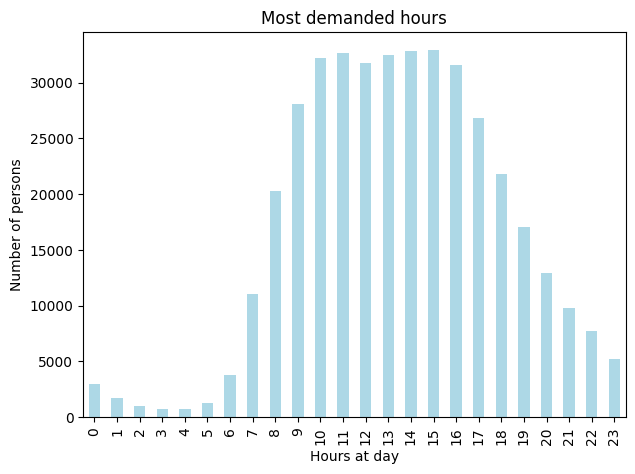

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_id,2991,1671,958,744,735,1281,3757,10993,20268,28112,...,32797,32894,31579,26825,21795,17026,12891,9806,7670,5167


In [431]:
#2.- Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
people_per_day_df = instacart_orders_df.groupby(by="order_hour_of_day")['user_id'].nunique()


people_per_day_df.plot(kind='bar',
                       xlabel='Hours at day',
                       ylabel='Number of persons',
                       color= "lightblue",
                       figsize=[7,5],
                       title='Most demanded hours'
                       

)                    

plt.show()
pd.DataFrame(people_per_day_df).transpose() #Coloco apoyo visual y datos en base para reforzar la respuesta.


Dentro del grafico "Most demanded hours" podemos observar una distribución normal de pedidos por horas (curva de bell), podemos destacar que las horas con mayor demanda se encuentran entre las 10:00 am y 04:00 p.m., también podemos notar un número bajo de pedidos de 1 a 5 de la mañana lo cual podría tener relación con los horarios de sueño de los usuarios.

### [A3] ¿Qué día de la semana compran víveres las personas?

<Axes: title={'center': 'Most demanded days'}, xlabel='Days of the week', ylabel='Number of orders'>

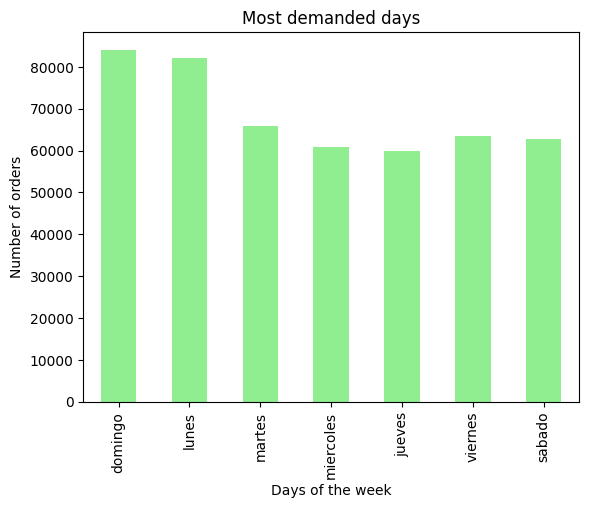

In [432]:
#3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.

buys_by_day = instacart_orders_df.groupby(by='order_dow')["order_id"].nunique()
dow_dict= {0: "domingo",1: "lunes",2:"martes",3:"miercoles",4:"jueves", 5:"viernes",6: "sabado" } #confirmar si el día 0 = domingo para correr estas dos lineas
buys_by_day = buys_by_day.rename(index=dow_dict)
buys_by_day.plot(
    kind='bar',
    xlabel='Days of the week',
    ylabel="Number of orders",
    title="Most demanded days",
    color="lightgreen")


Los días con mas demanda de compra son los días domingo, seguido de lunes y martes. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

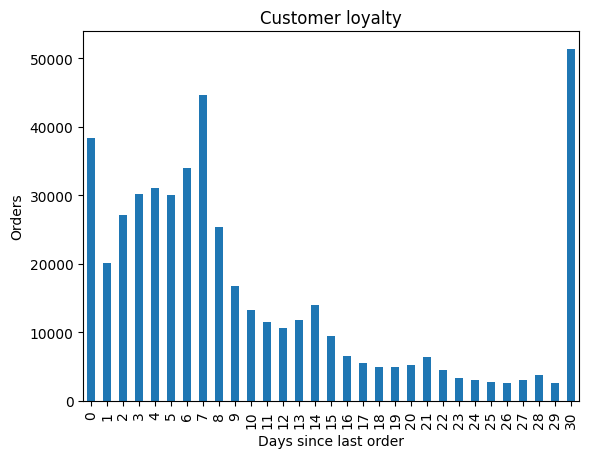

In [433]:
time_to_next_order = instacart_orders_df.groupby(by='days_since_prior_order')["days_since_prior_order"].value_counts()
instacart_orders_df
time_to_next_order.plot(kind="bar", xlabel="Days since last order", ylabel="Orders", title='Customer loyalty')
plt.show()
min= time_to_next_order.min() #2640
max= time_to_next_order.max() #51337
total = time_to_next_order.sum() #478952
max_share= (max*100)/total # max_share #10.72

first_third= time_to_next_order.iloc[0:11].sum() #310979
first_third_share= (first_third*100)/total # first_third_share 64.92%
# pd.DataFrame(time_to_next_order).transpose()


Si bien podemos observar en la siguiente tabla que existe una tendencia en los usuarios para hacer su pedido después de 30 días (con un valor de 51,337 registros), la realidad es que esta representa el 10.72% de los valores totales. Dentro de los primeros 10 días podemos ver un total de 310,979 registros de ordenes, mismos que representan el 64.92% del total de registros.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

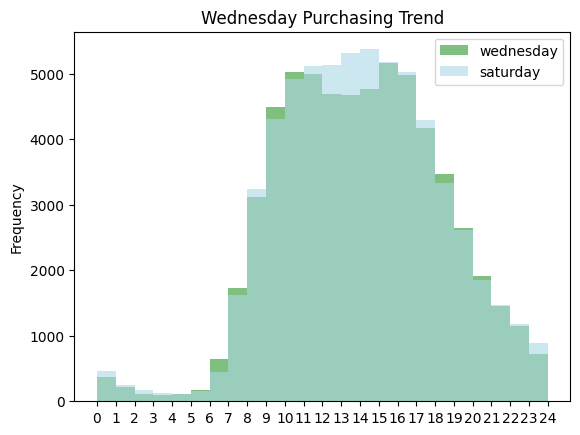

In [434]:
wednesday_orders_df = instacart_orders_df[instacart_orders_df['order_dow']==3]
saturday_orders_df = instacart_orders_df[instacart_orders_df['order_dow']==6]

wednesday_orders_df['order_hour_of_day'].plot(kind='hist', bins=range(0, 25), alpha=0.5, xlabel="time of the day" , ylabel="orders", title="Wednesday Purchasing Trend", color="g")
saturday_orders_df['order_hour_of_day'].plot(kind='hist',bins=range(0, 25), alpha=0.6, color="lightblue")
plt.xticks(range(0,25),range(0,25)) #Primer parametro asigna los valores, mientras que el segundo el label para los mismos.
plt.legend(["wednesday","saturday"])
plt.show()

# saturday_orders_df['order_hour_of_day'].value_counts().sort_index()

El comportamiento parece muy similar en miercoles y sabado, sin embargo podemos observar un decremento en los días 12, 13 y 14 para los días miercoles

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<Axes: ylabel='Frequency'>

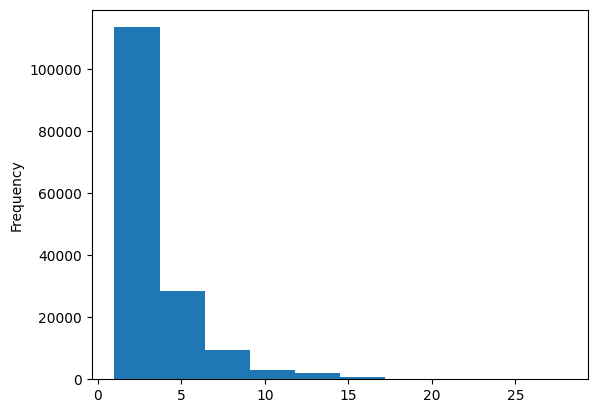

In [435]:
orders_by_client = instacart_orders_df.groupby(["user_id"])["order_number"].count()
orders_by_client.plot(kind="hist")


Podemos observar una distribución asimetrica positiva, La mayoría de clientes realizan menos de 5 pedidos

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [436]:
order_products_df #Llamamos la tabla donde obtendremos el top 20 productos.

top_20 = order_products_df["product_id"].value_counts().sort_values(ascending=False) #Contamos los productos mas consumidos y los ordenamos de manera descendente
# order_products_df.groupby('product_id')["product_id"].count().sort_values(ascending=False).head(5) #otra forma de hacerlo
top_20= top_20.head(21) #Filtramos por los primeros 20 valores

top_20_df = pd.DataFrame(data={"product_id":top_20.index,"counts":top_20.values}) #Al filtrarlo se vuelve un series, por lo que procedo a crear un nuevo df
top_20_df = top_20_df.merge(products_df, on="product_id", how="left") #Finalmente, uno esta tabla con la tabla product para poder extraer el nombre
top_20_df = top_20_df.iloc[:,:3]
top_20_df


,product_id,counts,product_name
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


Al parecer los productos mas demandados son Frutas (banana, limas,limones,frambuesas), Verduras (Cebolla, Ajo,Pepino, Tomates), y Leche

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

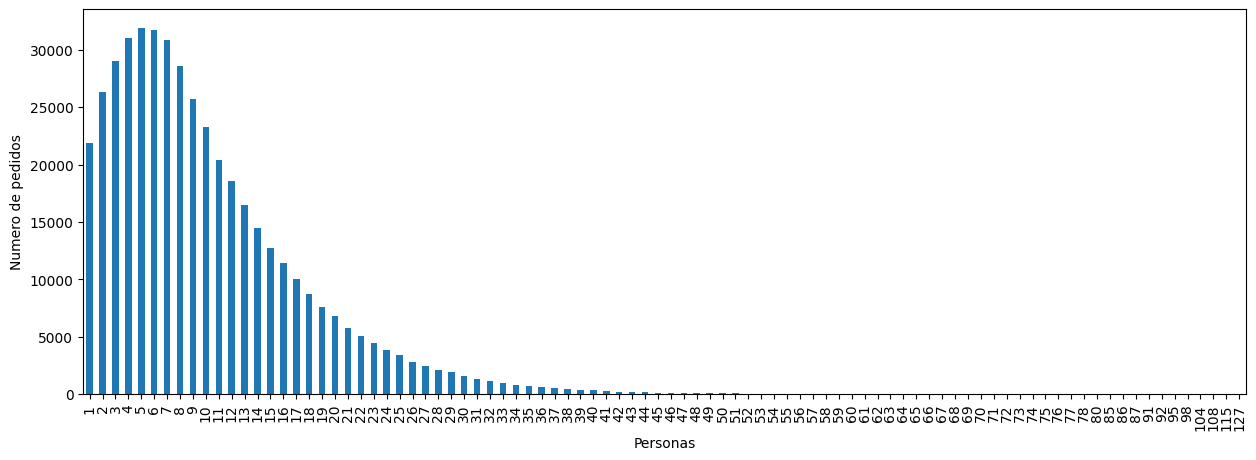

In [437]:
# order_products_df
item_by_person = order_products_df.groupby('order_id')["product_id"].count().sort_values() #Filtramos para obtener cada item por producto.
item_by_person = item_by_person.value_counts().sort_index() 
item_by_person.plot(kind="bar", figsize=(15,5),xlabel="Personas", ylabel="Numero de pedidos")
plt.show()


La mayoría de personas tiene preferencia a comprar de 4 a 7 productos, sin embargo el número de productos más demandado es 5

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

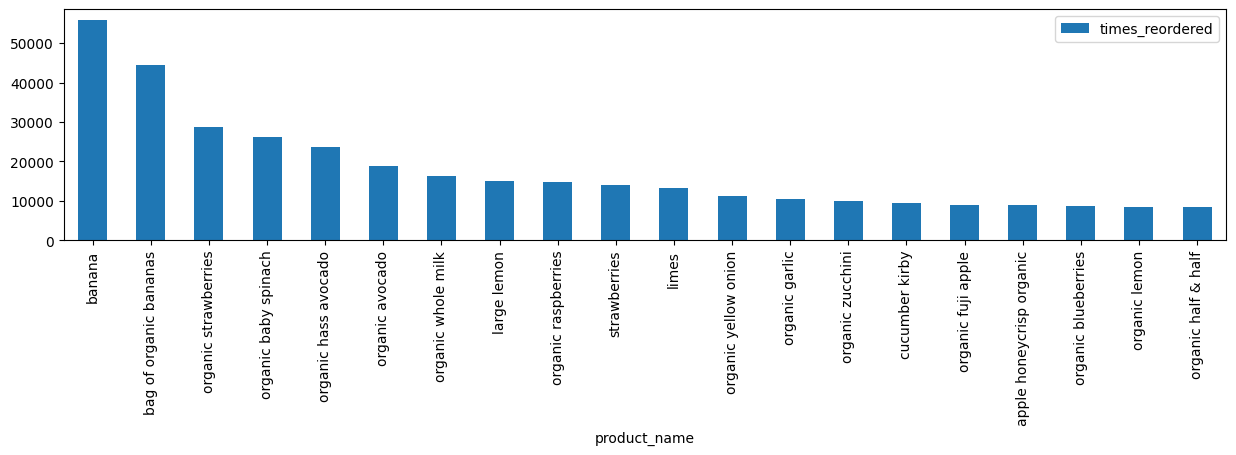

,product_id,times_reordered,product_name
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


In [438]:
top_reordered= order_products_df.groupby("product_id")["reordered"].sum().sort_values(ascending=False).head(20) #agrupamos por product ID y sumamos los productos que fueron reordenados.
top_reordered_df = pd.DataFrame(data={'product_id':top_reordered.index, "times_reordered": top_reordered.values}) #Al debolvernos una serie lo transformo a formato DF de nuevo.
top_reordered_df = top_reordered_df.merge(how="left", on="product_id", right=products_df) #Realizamos un merge para obtener los nombres de los productos.

top_reordered_g = top_reordered_df.iloc[:,[2,1]]  #Obtenemos las columnas que nos interesan
top_reordered_g.plot(kind="bar" ,x="product_name", y='times_reordered', figsize=[15,3]) #Graficamos una barra para una mejor visualización de los datos
plt.show()
top_reordered_df.iloc[:,0:3]

Las bananas lideran como produto mas repetido de compra, ya sea de manera singular o en bolsa. A pesar de tener una gran categoría de productos, las mayores recompras se basan en frutas y verduras.Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [439]:

# Generamos una agrupación que nos devolvera cuantos productos se pidieron y cuandos se reordenaron
agg_dict= {"product_id":"count", "reordered":"sum"} 
share_df = order_products_df.groupby("product_id").agg(agg_dict) 


#Generamos dos columnas con la proporcion sobre el total de ordenes.
share_df["reordered_share"]=(share_df["reordered"]/share_df["product_id"])*100 
share_df = share_df.sort_values(by="reordered_share", ascending=False)
share_df.head(10)
share_df.sample(10)

,product_id,reordered,reordered_share
product_id,,,
2458,64,43,67.187500
2927,26,6,23.076923
43955,86,19,22.093023
36664,267,153,57.303371
9869,27,10,37.037037
10029,24,2,8.333333
7054,881,614,69.693530
13223,42,20,47.619048
22428,63,38,60.317460


In [440]:
order_products_df[order_products_df["product_id"]==14721] #Tengo dudas de la fidelidad del conjunto de datos original. Este producto no había sido pedido anteriormente y contiene el dato reordered 1

,order_id,product_id,add_to_cart_order,reordered
3636585,938604,14721,5,1


Se necesita analizar el conjunto de datos original order_products_df ya que contiene datos que no habían sido pedidos con anterioridad y, sin embargo, son marcados como si ya hubieran sido ordenados anteriormente.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [441]:
# instacart_orders_df #vamos a utilizar esta base para hacer el merge
product_ratio = order_products_df.merge(how="left", right=instacart_orders_df[["order_id","user_id"]], on="order_id") 

In [442]:
# agruparemos, por user ID y analizaremos las columnas product_id y reordered, finalmente realizaremos el calculo para tener la proporcion.
dict_agg= {"product_id":"count", "reordered":"sum"}
product_ratio = product_ratio.groupby("user_id").agg(dict_agg)
product_ratio["reordered_ratio"] = ((product_ratio["reordered"] / product_ratio["product_id"]) *100).round(2)

In [443]:
#Imprimiremos valores de analisis y la tabla final
print("El valor maximo de reordered_ratio",product_ratio["reordered_ratio"].max())
print("El valor mínimo de reordered_ratio",product_ratio["reordered_ratio"].min())
print("El valor promedio de reordered_ratio",product_ratio["reordered_ratio"].mean())
print("El valor de la mediana de reordered_ratio",product_ratio["reordered_ratio"].median())
product_ratio= product_ratio.reset_index()
product_ratio


El valor maximo de reordered_ratio 100.0
El valor mínimo de reordered_ratio 0.0
El valor promedio de reordered_ratio 49.4853181265288
El valor de la mediana de reordered_ratio 50.0


,user_id,product_id,reordered,reordered_ratio
0,2,26,1,3.85
1,4,2,0,0.00
2,5,12,8,66.67
3,6,4,0,0.00
4,7,14,13,92.86
...,...,...,...,...
149621,206203,27,6,22.22
149622,206206,21,15,71.43
149623,206207,46,41,89.13
149624,206208,125,87,69.60


<Axes: >

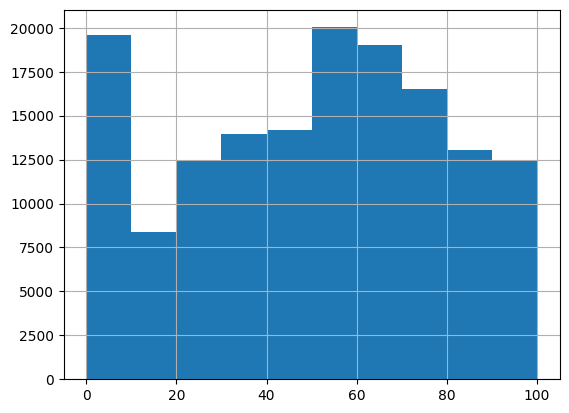

In [444]:
# Ahora comprobaremos con un histograma la distribución de reordered ratio

product_ratio["reordered_ratio"].hist()

Dentro de estas bases pudimos observar un total de 206209 usuarios únicos con sus respectivos comportamientos de compra, como pueden observar en la tabla, hemos obtenido proporcion para cada usuario único, sin embargo para tener un mejor análisis de los valores, he decidido realizar un histograma que nos permite visualizar la distribución de "reordered_ratio", el comportamiento se inclina para usuarios que no habían solicitado el producto anteriormente y aquellos que lo habían hecho de un 45% a un 50%

En contraste la tabla nos arroja un valor maximo de 100 y minimo de 0, con un promedio de 49%, el histrograma



<div class="alert alert-success">
<b>✔️  Comentario del revisor:</b> Buen trabajo.</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [445]:
# instacart_orders_df #vamos a utilizar esta base para hacer el merge
first_item = order_products_df[order_products_df["add_to_cart_order"]==1]
first_item = first_item.groupby("product_id")["add_to_cart_order"].sum().sort_values(ascending=False).head(20)
first_item = first_item.reset_index()

In [446]:
first_item= first_item.merge(how="left", right=products_df[["product_id","product_name"]], on="product_id")

In [447]:
first_item.rename(columns={"add_to_cart_order": "first_add_count"}, inplace=True)
first_item

,product_id,first_add_count,product_name
0,24852,15562,banana
1,13176,11026,bag of organic bananas
2,27845,4363,organic whole milk
3,21137,3946,organic strawberries
4,47209,3390,organic hass avocado
5,21903,3336,organic baby spinach
6,47766,3044,organic avocado
7,19660,2336,spring water
8,16797,2308,strawberries
9,27966,2024,organic raspberries


<Axes: xlabel='Product', ylabel='First add count'>

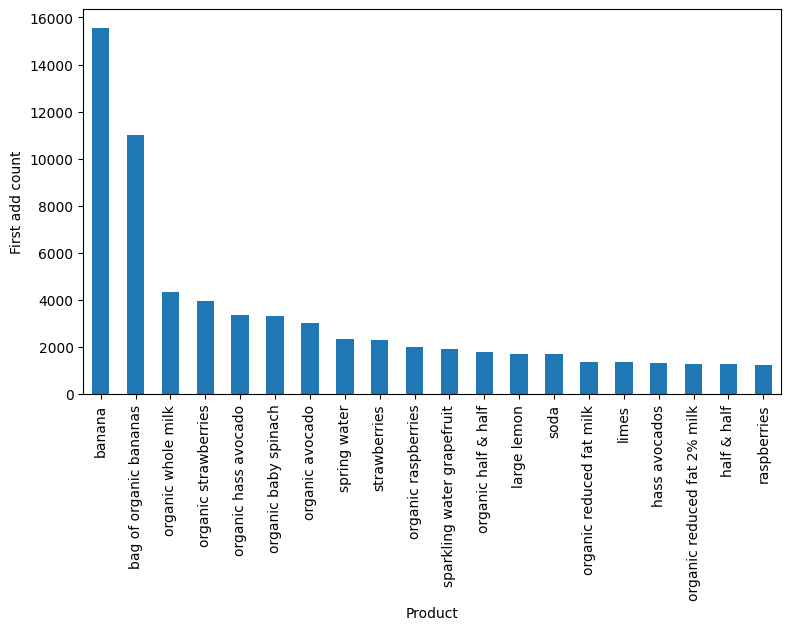

In [448]:
first_item.plot(kind="bar", x="product_name" , y="first_add_count" ,legend=None ,xlabel="Product", ylabel="First add count", figsize=[9,5])

Nuevamente las frutas y verduras lidera el listado, sin embargo podemos observar que el agua de manantial, la soda y half & half son productos que no habíamos visto anteriormente

### Conclusion general del proyecto:

En conclusion podemos compartir los siguientes elementos clave con la empresa Instacart:


- Días con mas demana : Los días con mas demanda de compra son los días domingo, seguido de lunes y martes. 
- Horarios con más demanda: Podemos destacar que las horas con mayor demanda se encuentran entre las 10:00 am y 04:00 p.m., también podemos notar un número bajo de pedidos de 1 a 5 de la mañana lo cual podría tener relación con los horarios de sueño de los usuarios. 
- Lealtad de los clientes: Dentro de los primeros 10 días podemos ver que el 64.92% del total de usuarios deciden volver a utilizar la aplicacion.
- Productos mas solicitados: Los productos estrella mas solicitados forman parte de las categorias de frutas y verduras.
- El equipo instacart podría perpararse para la demanda de los horarios con mayor demana e incluso ofrecer promociones en los horarios días mas bajos. Tambien es importante considerar a aquellos usuarios que no frecuentan la plataforma, ofreciendo cupones o analizando si los productos que requieren se encuentran disponibles en la plataforma.
- Enfocarse los productos más solicitados para estar preparados para una mejor demanda y a su vez analizar si otros productos no son tan consumidos por otras variables (ejemplo: "procesos o refrigeración").


<div class="alert alert-success">
<b>✔️  Comentario del revisor:</b> Buen trabajo Juan, exitos en lo que sigue!.</div>